In [107]:
from scipy.stats import mannwhitneyu, normaltest
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple

%matplotlib inline

In [101]:
# descriptive statistics for experiment run with MAE as fitness
results_absolute.describe().to_csv("../docs/rmd/tables/descriptive_stats_absolute.csv")
results_absolute.describe().to_markdown("../docs/rmd/tables/descriptive_stats_absolute.md")
results_absolute.describe()

,fit_train_tournament,fit_test_tournament,fit_train_elexicase,fit_test_elexicase
count,100.000000,100.000000,100.000000,100.000000
mean,3.573253,3.563622,3.111886,3.137443
std,0.768300,0.764872,0.685969,0.653923
min,2.321738,2.196453,1.576327,1.678117
25%,3.227019,3.222105,2.606338,2.618120
50%,3.463482,3.482026,3.196373,3.174337
75%,3.793771,3.692923,3.598737,3.621362
max,8.262926,8.522100,5.155625,4.948786


In [90]:
# descriptive statistics for experiment run with MSE as fitness
results_square.describe().to_csv("../docs/rmd/tables/descriptive_stats_square.csv")
results_square.describe().to_markdown("../docs/rmd/tables/descriptive_stats_square.md")
results_square.describe()

,fit_train_tournament,fit_test_tournament,fit_train_elexicase,fit_test_elexicase
count,100.000000,100.000000,100.000000,100.000000
mean,23.610171,23.934988,19.988472,20.442400
std,11.162920,11.212483,12.009220,11.960861
min,10.988769,11.146286,3.165682,2.948830
25%,17.741688,17.799039,11.073847,12.935433
50%,21.016834,21.177051,17.381606,18.179904
75%,24.475491,24.485895,25.630302,24.435983
max,73.716858,70.483450,66.005119,64.794064


In [91]:
n_squared = len(results_square)
n_absolute = len(results_absolute)

In [92]:
# Check if data series are normal distributed at alpha=5%

HEADERS = results_square.columns.values.tolist()

print("MSE-Based: \n----")
for header in HEADERS:

    print(f"Data Series: {header}")
    statistic, pval = normaltest(results_square[header])

    print(f"Statistic: {statistic}\nP-Val: {pval}\n")



print("MAE-Based: \n----")
for header in HEADERS:

    print(f"Data Series: {header}")
    statistic, pval = normaltest(results_absolute[header])

    print(f"Statistic: {statistic}\nP-Val: {pval}\n")


MSE-Based: 
----
Data Series: fit_train_tournament
Statistic: 69.09240993119388
P-Val: 9.925989529490364e-16

Data Series: fit_test_tournament
Statistic: 65.96269694585169
P-Val: 4.746596913341957e-15

Data Series: fit_train_elexicase
Statistic: 39.033311122621996
P-Val: 3.3421365083225614e-09

Data Series: fit_test_elexicase
Statistic: 41.15142953785429
P-Val: 1.158992470768308e-09

MAE-Based: 
----
Data Series: fit_train_tournament
Statistic: 94.51471948070684
P-Val: 2.9949490283913427e-21

Data Series: fit_test_tournament
Statistic: 102.50056471468105
P-Val: 5.52440075850509e-23

Data Series: fit_train_elexicase
Statistic: 0.0001971640933446212
P-Val: 0.9999014228123779

Data Series: fit_test_elexicase
Statistic: 0.40404083863475304
P-Val: 0.8170782435919183



In [108]:
def test_mannwhitneyu(df: pd.DataFrame, xheader: str, yheader: str) -> Tuple[float,float]:
    
    ALPHA = 0.05

    statistic, pval = mannwhitneyu(x = df[xheader],y = df[yheader])
    print(f"Statistic: {statistic}\nPVal: {pval}\nPVal < ALPHA: {pval < ALPHA}")

    if pval > ALPHA:
        print(f"Results supports H0 for alpha={ALPHA}\n H0: The distribution underlying sample {xheader} is the same as the distribution underlying sample {yheader}")

    else:
        print(f"H0 can be rejected for alpha={ALPHA}\nThe distribution underlying sample {xheader} is NOT the same as the distribution underlying sample {yheader}")
    
    return statistic, pval


Statistic: 6280.0
PVal: 0.001770111863505041
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_train_tournament is NOT the same as the distribution underlying sample fit_train_elexicase


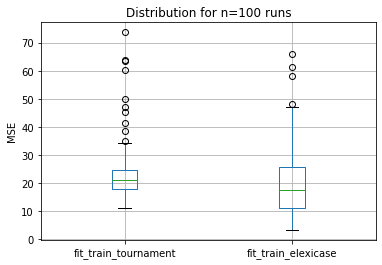

In [110]:
fit_train_square_mwu = test_mannwhitneyu(results_square, "fit_train_tournament", "fit_train_elexicase")

plt.figure()

subplot_train_squared = results_square.boxplot(column=[HEADERS[0], HEADERS[2]])
subplot_train_squared.set_ylabel("MSE")
subplot_train_squared.set_title(f"Distribution for n={n_squared} runs")

plt.savefig("../docs/rmd/plots/box_train_square.png")

Statistic: 6651.0
PVal: 5.511234174151425e-05
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_train_tournament is NOT the same as the distribution underlying sample fit_train_elexicase


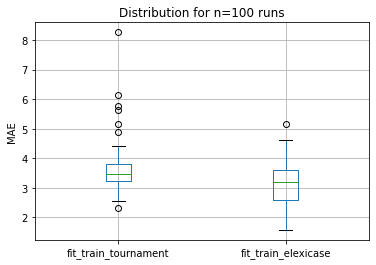

In [111]:
fit_train_abs_mwu = test_mannwhitneyu(results_absolute, "fit_train_tournament", "fit_train_elexicase")

plt.figure()

subplot_train_absolute = results_absolute.boxplot(column=[HEADERS[0], HEADERS[2]])
subplot_train_absolute.set_ylabel("MAE")
subplot_train_absolute.set_title(f"Distribution for n={n_absolute} runs")

plt.savefig("../docs/rmd/plots/box_train_absolute.png")

Statistic: 6273.0
PVal: 0.0018758683827533095
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_test_tournament is NOT the same as the distribution underlying sample fit_test_elexicase


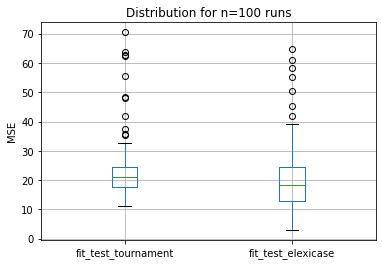

In [112]:
fit_test_square_mwu = test_mannwhitneyu(results_square, "fit_test_tournament", "fit_test_elexicase")

plt.figure()

subplot_test_squared = results_square.boxplot(column=[HEADERS[1], HEADERS[3]])
subplot_test_squared.set_ylabel("MSE")
subplot_test_squared.set_title(f"Distribution for n={n_squared} runs")

plt.savefig("../docs/rmd/plots/box_test_square.png")


Statistic: 6618.0
PVal: 7.744099850396849e-05
PVal < ALPHA: True
H0 can be rejected for alpha=0.05
The distribution underlying sample fit_test_tournament is NOT the same as the distribution underlying sample fit_test_elexicase


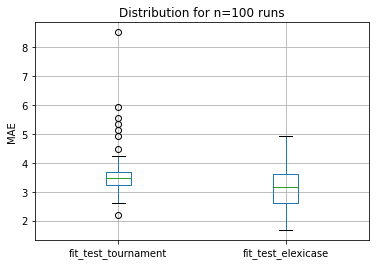

In [113]:
fit_test_abs_mwu = test_mannwhitneyu(results_absolute, "fit_test_tournament", "fit_test_elexicase")

plt.figure()

subplot_test_absolute = results_absolute.boxplot(column=[HEADERS[1], HEADERS[3]])
subplot_test_absolute.set_ylabel("MAE")
subplot_test_absolute.set_title(f"Distribution for n={n_absolute} runs")

plt.savefig("../docs/rmd/plots/box_test_abs.png")



In [124]:
# save mwu results in csv files

ALPHA = 0.05
PATH = "../docs/rmd/tables/testing_mwu.csv"

with open(PATH, "w") as file:
    file.write("phase,fitness_function,statistic,p-val,lt_alpha\n")
    file.write(f"testing,mse,{fit_test_square_mwu[0]},{fit_test_square_mwu[1]},{fit_test_square_mwu[1] < ALPHA}\n")
    file.write(f"testing,mae,{fit_test_abs_mwu[0]},{fit_test_abs_mwu[1]},{fit_test_abs_mwu[1] < ALPHA}\n")

PATH = "../docs/rmd/tables/training_mwu.csv"

with open(PATH, "w") as file:
    file.write("phase,fitness_function,statistic,p-val,lt_alpha\n")
    file.write(f"training,mse,{fit_train_square_mwu[0]},{fit_train_square_mwu[1]},{fit_train_square_mwu[1] < ALPHA}\n")
    file.write(f"training,mae,{fit_train_abs_mwu[0]},{fit_train_abs_mwu[1]},{fit_train_abs_mwu[1] < ALPHA}\n")

    